In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


# Context

***STAKEHOLDER*** : Property management company

***BUSINESS PROBLEM*** : Property management company is creating a new campaign that will target recent college graduates from local universities 
- The company knows this demographic will not be able to afford expensive properties 
    - Will be looking for smaller / less expensive places
    - Will be looking for places with more sq footage to split amongst many tennants 
- The company wants to have a better idea of what kinds of properties they should be promoting among this demographic  

# Obtain / Scrub

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Initial Observations** 

1) Columns with null data:
- waterfront
- yr_renovated
- view

2) sqft_basement is a string when it should probably be an int or float 

3) date column is not in datetime 

In [4]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

Over 2,000 null values
- this data could be filled given the distribution of waterfront properties 
    - Initially I feel like 2,000 is too much to replace 

In [6]:
#replacing null values based on the existing distribution of data from 'waterfront'
waterfront_dist = df['waterfront'].value_counts(normalize=True)
waterfront_na = df['waterfront'].isna()

df.loc[waterfront_na,'waterfront'] = np.random.choice(waterfront_dist.index, size=len(df[waterfront_na]), p=waterfront_dist.values)

In [7]:
# no more null values
# df['waterfront'].isna().value_counts()

In [8]:
# new values
# df['waterfront'].value_counts()

In [9]:
df['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [10]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

Nearly 4,000 null values 
- a value of '0' indicates no renovations have taken place 
- 95% of houses have not recieved rennovations

In [12]:
ren_dist = df['yr_renovated'].value_counts(normalize=True)
ren_na = df['yr_renovated'].isna()

df.loc[ren_na,'yr_renovated'] = np.random.choice(ren_dist.index, size=len(df[ren_na]), p=ren_dist.values)

In [13]:
# no more null values
# df['yr_renovated'].isna().value_counts()

In [14]:
# new value distribution
# distributions have changed by the ten thousandth place 
# df['yr_renovated'].value_counts(normalize=True)

In [15]:
df['view'].isna().value_counts()

False    21534
True        63
Name: view, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Cleaning sqft_basement

In [18]:
df[(df['sqft_basement'] == '?')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [19]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.594316
?         0.020990
600.0     0.010031
500.0     0.009706
700.0     0.009613
            ...   
1135.0    0.000046
2250.0    0.000046
861.0     0.000046
1284.0    0.000046
915.0     0.000046
Name: sqft_basement, Length: 302, dtype: float64

454 rows have the value "?", which makes it impossible to convert to a float
- Based on the relevance of basements being used as living space for the target demographic, I will not drop this data
- I am going to continue by filling '?' with values with respect to the distribution of exisitng values 

In [20]:
# replacing all '?' values with NaN to make replacing easier
df['sqft_basement'].replace(to_replace = '?', value=np.NaN, inplace=True)

basement_dist = df['sqft_basement'].value_counts(normalize=True)
basement_na = df['sqft_basement'].isna()

df.loc[basement_na,'sqft_basement'] = np.random.choice(basement_dist.index, size=len(df[basement_na]), p=basement_dist.values)

In [21]:
# no null values
# df['sqft_basement'].isna().value_counts()


In [22]:
#checking new distribution
#df['sqft_basement'].value_counts(normalize=True)

In [23]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

### Defining/ Calculating "Affordable"

It is safe to assume that recent college graduates will not be looking to purchase a home, but the only available data regarding price is the entire price of the property

To account for this the following measures have been taken: 
- An 'affordable' rent (for a single individual living alone) has been defined as <= 1,146 USD (2015 median rent in King County)
    - source : https://www.deptofnumbers.com/rent/washington/king-county/
- To convert the 'affordable rent' value to a corresponding 'house price' value I performed the following calculation:
    - 2015 Median house price / 2015 Median rent 
    - 450,000 / 1,146 = 0.25% 
    - multiplied by 12 to obtain annual rent 

In [24]:
# df['rent'] = (df['price']*0.0025)*12

Given that recent college graduates often live with multiple roommates, I will be assuming the potential for having 3 tennants for a property 
- Given this assumption, I will not be looking at houses priced over 1,350,000 USD (3x the median price) 

In [25]:
# df = df[(df['price'] <= 1350000)]

In [26]:
# checking results of transformation
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Only reduced the total number of rows by approx 600

### Dealing with Duplicates

Because each house has a unique id ('id'), any duplicates will make analysis more difficult

In [27]:
df.drop_duplicates('id', keep='last', inplace=True)

In [28]:
# checking 
#print(df.info())
# len(df['id'].unique())

While I assume the repeated id's are from houses being sold more than once, I do not believe this will be a feature that I will be investigating, so I am keeping the most recent sale of each duplicated house

### Creating lot15/living15 Comparison Columns

I think it will be helpful to better understand how a property's living/lot space relative to their 15 neighbor's spaces will affect price

In [29]:
df['rel_lot'] = df['sqft_lot15'] - df['sqft_lot']
df['rel_living'] = df['sqft_living15'] - df['sqft_living']

<AxesSubplot:xlabel='rel_lot', ylabel='price'>

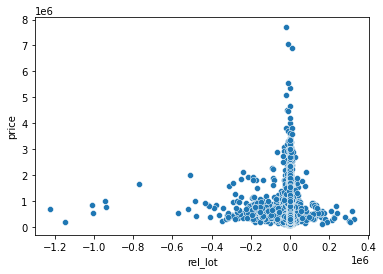

In [30]:
sns.scatterplot(x= 'rel_lot', y='price', data= df)

It would appear that the relative lot space does not any sort of linear relationship with price
- there are a seemingly equal ammount of houses that have negligible (close to 0) differences in lot sqftage that are valued from very low to very high ranges

<AxesSubplot:xlabel='rel_living', ylabel='price'>

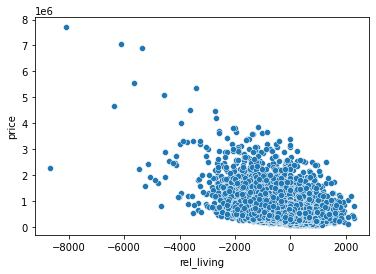

In [31]:
sns.scatterplot(x= 'rel_living', y='price', data= df)

It would appear that the relative living space does not any sort of linear relationship with price

### Converting to DateTime

In [32]:
df['month'] = pd.to_datetime(df['date']).dt.month

### Checking Multicullinearity 

<AxesSubplot:>

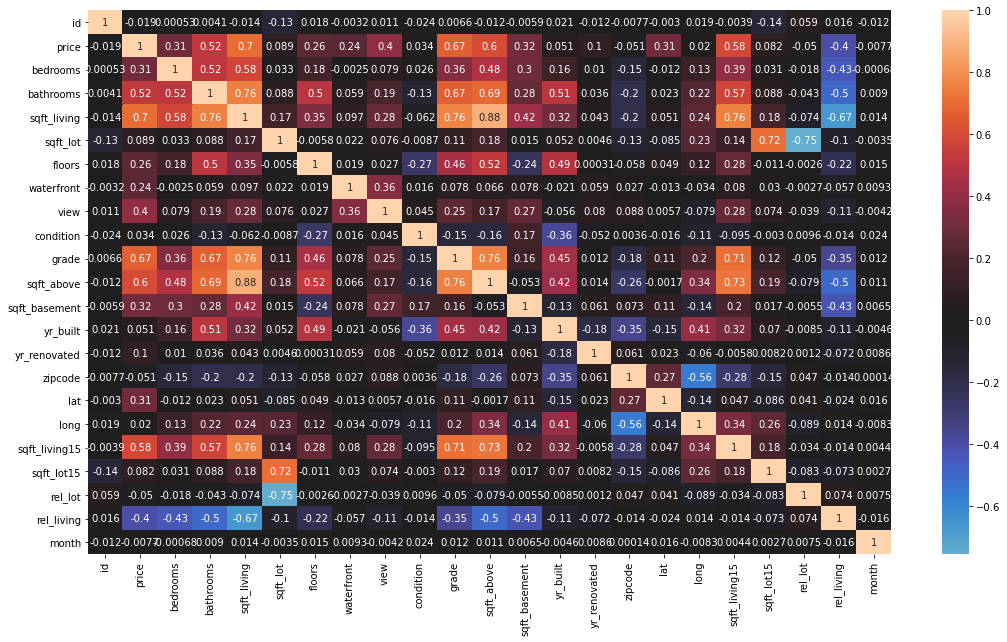

In [33]:
plt.figure(figsize=(18,10))
sns.heatmap(data = df.corr(), center=0, annot=True)

**Observations**
- The only disruptive correlations (above 0.75) are between sqft_living and sqft_above (0.86)
    - I will be dropping sqft_above, considering sqft_living already takes the upstairs living space into account
- This confirms that rel_lot does not have a correlation with price
    - however, rel_living might be useful for the model 

In [34]:
df.drop('sqft_above', axis=1, inplace=True)
df.drop('rel_lot', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

# Explore 

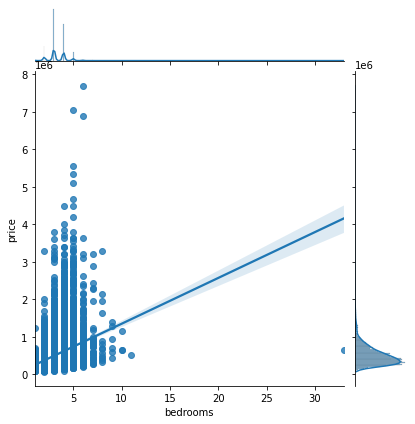

In [35]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')


### Investigating house with over 30 bedrooms

In [36]:
df[(df['bedrooms'] > 30)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_living,month
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,-290,6


33 bedrooms with onlh 1620 sqft living space
- I am going to delete this datapoint

In [37]:
# indexname = df[(df['bedrooms'] > 30)].index
# df.drop(indexname, inplace=True)

# Explore (Cont'd)

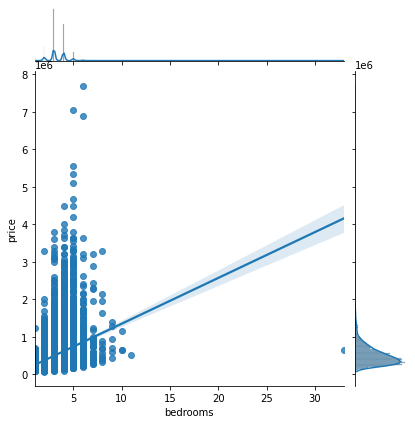

In [38]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')


11 bedrooms still seems unusual... but I will keep for now

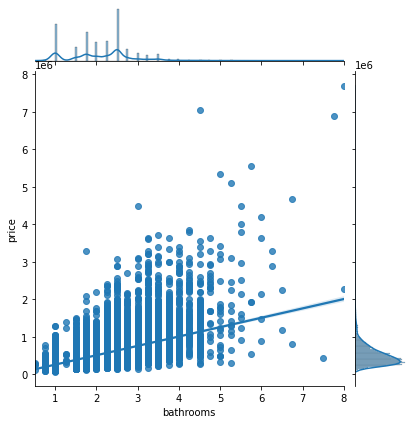

In [39]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

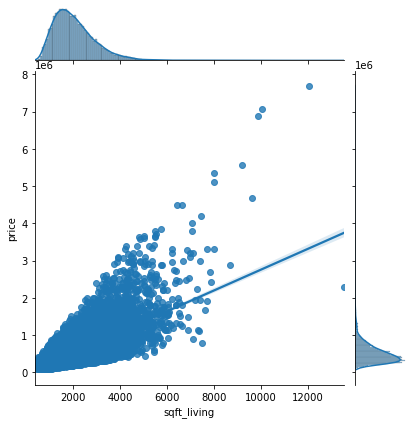

In [40]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

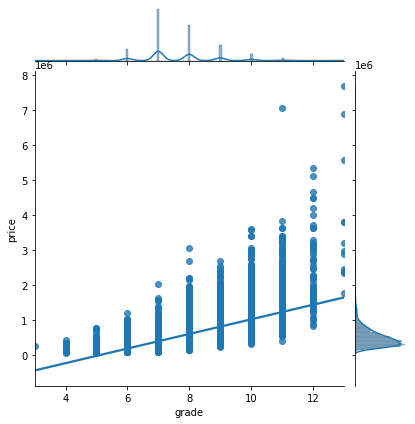

In [41]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

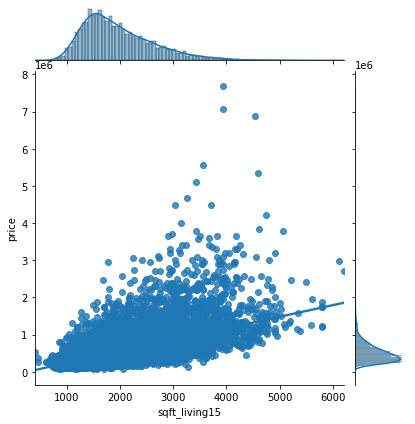

In [42]:
sns.jointplot(x='sqft_living15', y='price', data=df, kind='reg')

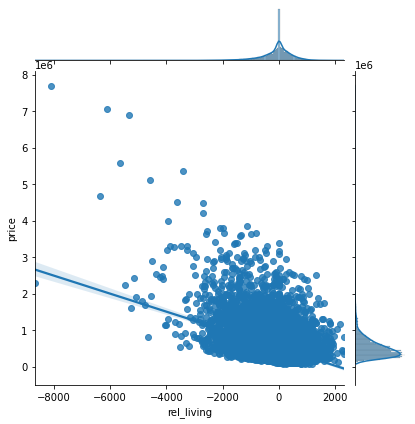

In [43]:
sns.jointplot(x='rel_living', y='price', data=df, kind='reg')

Still having doubts about usefullness of rel_living, but I will include it for sake of comparison

**OBSERVATIONS**
- The jointplots confirm what the heatmap has concluded 
    - positive correlations between price and bedrooms, bathrooms, sqft_living, grade, and sqft_living15
    - negative correlation between price and rel_living


### Baseline Model

In [44]:
outcome = 'price'
predictors = df.drop('price', axis=1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables
model_baseline = ols(formula=formula, data=df).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2598.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:19   Log-Likelihood:            -2.9112e+05
No. Observations:               21357   AIC:                         5.823e+05
Df Residuals:                   21337   BIC:                         5.824e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.011e+06   2.95e+06      2.719      0.007    2.24e+06    1.38e+07
id              -1.5e-06   4.85e-07     -3.090      0.002   -2.45e-06   -5.49e-07
bedrooms      -3.639e+04   1914.072    -19.011      0.000   -4.01e+04   -3.26e+04
bathrooms      4.126e+04   3271.059     12.613      0.000    3.48e+04    4.77e+04
sqft_living     126.7170      2.251     56.303      0.000     122.306     131.128
sqft_lot          0.1135      0.048      2.362      0.018       0.019       0.208
floors         9408.8526   3580.198      2.628      0.009    2391.394    1.64e+04
waterfront     5.197e+05    1.7e+04     30.613      0.000    4.86e+05    5.53e+05
view           5.752e+04   2116.657     27.177      0.000    5.34e+04    6.17e+04
condition      2.604e+04   2359.750     11.037      0.000    2.14e+04    3.07e+04
grade          9.715e+04   2171.874     44.729      0.000    9.29e+04    1.01e+05
sqft_basement   -28.2308      4.292     -6.577      0.000     -36.644     -19.817
yr_built      -2667.4818     71.712    -37.197      0.000   -2808.043   -2526.921
yr_renovated     20.6738      3.614      5.720      0.000      13.590      27.758
zipcode        -594.5096     33.200    -17.907      0.000    -659.585    -529.434
lat            6.019e+05   1.08e+04     55.786      0.000    5.81e+05    6.23e+05
long          -2.149e+05   1.32e+04    -16.242      0.000   -2.41e+05   -1.89e+05
sqft_living15    73.6939      2.140     34.443      0.000      69.500      77.888
sqft_lot15       -0.3997      0.074     -5.427      0.000      -0.544      -0.255
rel_living      -53.0218      1.986    -26.700      0.000     -56.914     -49.129
month         -3020.5268    442.426     -6.827      0.000   -3887.715   -2153.339
==============================================================================
Omnibus:                    18161.901   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1828442.761
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      47.764   Cond. No.                     2.49e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- Baseline model seems to be moderately good at explaining variations in price 
- All variables seem to be be well below a = 0.05
- Negative coefficients:
    - bedrooms
        - For 1 addition bedroom price drops approx 36,500
    - sqft_basement
        - For 1 addition sqft of basement price drops approx 28
    - yr_built
    - sqft_lot
    - rel_living
    - month 
    - most of these I would expect to increase price...


**Features to Drop**
- id (does not provide relevant information pertaining to price)

#### Baseline  Test

In [45]:
X = df.drop("price", axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)




In [46]:
baseline_linreg = LinearRegression()

baseline_linreg.fit(X_train, y_train)

y_pred = baseline_linreg.predict(X_test)

residuals = y_pred - y_test

In [47]:
baseline_linreg.coef_

array([-1.37190393e-06, -3.74472339e+04,  4.18791634e+04,  1.23251526e+02,
        2.15633582e-01,  7.89306439e+03,  5.61343918e+05,  5.38151604e+04,
        2.45464645e+04,  9.88327771e+04, -2.90030801e+01, -2.69299085e+03,
        2.09202216e+01, -6.06333025e+02,  6.08541552e+05, -2.06224877e+05,
        7.43356997e+01, -4.40716106e-01, -4.89158268e+01, -3.17273323e+03])

Train RMSE: 198527.77509364794
Test RMSE: 209453.96008426946
Test Difference: 10926.184990621521


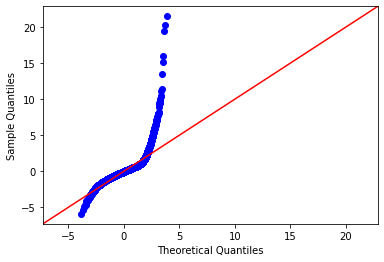

In [48]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

residuals = model_baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))
print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
fig.show()

**Interpretation**
- ???? Test MSE is higher than Train MSE but I don't know if its by a significant ammount ????
- I suppose this will serve as a comparison for other models

# Model 2

**Steps Taken For New Model**
- Remove all data regarding houses priced over 1,350,000
- Remove 'id'
- I will deal with outliers for Model 3

### Defining/ Calculating "Affordable"

It is safe to assume that recent college graduates will not be looking to purchase a home, but the only available data regarding price is the entire price of the property

To account for this the following measures have been taken: 
- An 'affordable' rent (for a single individual living alone) has been defined as <= 1,146 USD (2015 median rent in King County)
    - source : https://www.deptofnumbers.com/rent/washington/king-county/
- To convert the 'affordable rent' value to a corresponding 'house price' value I performed the following calculation:
    - 2015 Median house price / 2015 Median rent 
    - 450,000 / 1,146 = 0.25% 
    - multiplied by 12 to obtain annual rent 

In [49]:
# df['rent'] = (df['price']*0.0025)*12

Given that recent college graduates often live with multiple roommates, I will be assuming the potential for having 3 tennants for a property 
- Given this assumption, I will not be looking at houses priced over 1,350,000 USD (3x the median price) 

In [50]:
df_model2 = df[(df['price'] <= 1350000)]
# df_model2

Only reduced the total number of rows by approx 600

In [51]:
df_model2.drop('id', axis=1, inplace=True)

### Model 2 Summary

In [52]:
def summary(df, preds): # predictors must be str
    outcome = 'price'
    predictors = preds
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    global model 
    model = ols(formula=formula, data=df).fit()
    return model.summary()

In [53]:
summary(df_model2, df_model2.drop('price', axis=1) )

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2785.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:19   Log-Likelihood:            -2.7214e+05
No. Observations:               20671   AIC:                         5.443e+05
Df Residuals:                   20652   BIC:                         5.445e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.948e+06   1.88e+06     -3.693      0.000   -1.06e+07   -3.26e+06
bedrooms      -1.072e+04   1242.635     -8.626      0.000   -1.32e+04   -8283.723
bathrooms      2.643e+04   2131.171     12.401      0.000    2.23e+04    3.06e+04
sqft_living      69.9889      1.518     46.100      0.000      67.013      72.965
sqft_lot          0.2076      0.031      6.629      0.000       0.146       0.269
floors         3.392e+04   2319.614     14.624      0.000    2.94e+04    3.85e+04
waterfront     1.392e+05   1.43e+04      9.750      0.000    1.11e+05    1.67e+05
view           3.783e+04   1432.833     26.400      0.000     3.5e+04    4.06e+04
condition      2.747e+04   1508.088     18.213      0.000    2.45e+04    3.04e+04
grade           8.02e+04   1413.181     56.754      0.000    7.74e+04     8.3e+04
sqft_basement     0.6871      2.866      0.240      0.811      -4.930       6.304
yr_built      -2004.3590     46.450    -43.151      0.000   -2095.405   -1913.313
yr_renovated     15.9419      2.370      6.726      0.000      11.296      20.588
zipcode        -266.3336     21.271    -12.521      0.000    -308.027    -224.640
lat            5.587e+05   6824.477     81.866      0.000    5.45e+05    5.72e+05
long          -8.117e+04   8406.472     -9.656      0.000   -9.77e+04   -6.47e+04
sqft_living15    60.3343      1.410     42.784      0.000      57.570      63.098
sqft_lot15       -0.1630      0.048     -3.412      0.001      -0.257      -0.069
rel_living       -9.6596      1.374     -7.029      0.000     -12.353      -6.966
month         -2355.9633    282.422     -8.342      0.000   -2909.533   -1802.393
==============================================================================
Omnibus:                     2976.959   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7684.234
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       5.513   Cond. No.                     1.99e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**INTERPRETATION**
- Very small increase in Rsquared
- sqft_basement now has a p-value much higher than 0.05
    - I will consider dropping, however, I think it will become significant once outliers are dealt with 
- Negative Coef:
    - bedrooms
    - sqft_basement
    - yr_built
    - sqft_lot15
    - rel_living
    - month
    - same as baseline...

#### Model 2  Test

In [54]:
def tt_split(df, preds):
    X = preds
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
    
    baseline_linreg = LinearRegression()
    baseline_linreg.fit(X_train, y_train)
    y_pred = baseline_linreg.predict(X_test)
    residuals = y_pred - y_test
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    
    return print('Train MSE:', np.sqrt(mse_train), '\n'
                'Test MSE:', np.sqrt(mse_test), '\n'
                'Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train)), fig.show();
                


Train MSE: 124936.4592694975 
Test MSE: 130395.21898832609 
Test Difference: 5458.759718828587


(None, None)

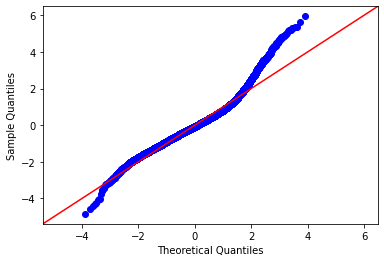

In [55]:
tt_split(df_model2, df_model2.drop('price', axis=1) )

**Interpretation**
- The MSE's are closer than the baseline model (by 1%)
- Residuals are looking much better
    - Hopefully dealing with outliers will deal with the flucation starting around x=3
    

# Model 3

In [56]:
df_model3 = df_model2

In [57]:
df_model3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_living,month
count,2.067100e+04,20671.000000,20671.000000,20671.000000,2.067100e+04,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.000000,20671.00000,20671.000000,20671.000000,20671.000000,20671.000000
mean,4.949881e+05,3.347492,2.074948,2011.058439,1.472544e+04,1.484108,0.004112,0.192202,3.408543,7.578685,274.627546,1970.961976,77.902907,98078.400126,47.558383,-122.21335,1946.839630,12520.126215,-64.218809,6.570606
std,2.338146e+05,0.913771,0.723435,809.836213,4.008219e+04,0.537763,0.063995,0.681264,0.647680,1.074527,418.008471,29.266854,386.523260,53.330424,0.140098,0.14193,639.483957,26520.413783,541.604446,3.115225
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,651.000000,-4670.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1952.000000,0.000000,98033.000000,47.464800,-122.33000,1480.000000,5050.000000,-290.000000,4.000000
50%,4.450000e+05,3.000000,2.250000,1880.000000,7.525000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.569100,-122.23100,1820.000000,7560.000000,0.000000,6.000000
75%,6.200000e+05,4.000000,2.500000,2480.000000,1.042300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,530.000000,1996.000000,0.000000,98118.000000,47.679200,-122.12300,2310.000000,9949.500000,222.500000,9.000000
max,1.350000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,5790.000000,871200.000000,2310.000000,12.000000


**Outliers**
- Max 33 bedrooms is an extreme outlier
- Min 0.5 bathroom seems to be a mistake

In [58]:
df_model3['bedrooms'].value_counts()

3     9569
4     6502
2     2717
5     1405
6      236
1      191
7       32
8        9
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

- 33 Bedrooms is certianly a mistake
- Based on my business problem, I do not believe recent graduates will be looking for houses with over 7 bedrooms
    - I do not believe recent graduates would be looking at anything with more than 5 bedrooms, but for the sake of keeping data I will only prune bedrooms > 7
    - this will remove 51 datapoints

In [59]:
df_model3 = df_model3[(df_model3['bedrooms'] < 8)]

In [60]:
df_model3[(df_model3['bathrooms'] < 0.75)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rel_living,month
2259,273000.0,2,0.5,1180,7750,1.0,0.0,0.0,4,6,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976,200,10
10413,109000.0,2,0.5,580,6900,1.0,0.0,0.0,3,5,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040,990,1
11662,255000.0,1,0.5,880,1642,1.0,0.0,0.0,3,6,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992,530,8
12029,312500.0,4,0.5,2300,5570,2.0,0.0,0.0,3,8,630.0,1996,0.0,98092,47.3285,-122.168,1820,6371,-480,12


- I am making the assumption that any property with less than .75 bathroom (sink, bath/shower, toilet) is not a feasible living space 

In [61]:
df_model3= df_model3[(df_model3['bathrooms'] > 0.5)]

In [62]:
summary(df_model3, df_model3.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2784.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:20   Log-Likelihood:            -2.7182e+05
No. Observations:               20648   AIC:                         5.437e+05
Df Residuals:                   20629   BIC:                         5.438e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.884e+06   1.88e+06     -3.658      0.000   -1.06e+07    -3.2e+06
bedrooms       -1.25e+04   1319.702     -9.474      0.000   -1.51e+04   -9915.997
bathrooms      2.683e+04   2142.239     12.522      0.000    2.26e+04     3.1e+04
sqft_living      70.8074      1.529     46.296      0.000      67.810      73.805
sqft_lot          0.2065      0.031      6.601      0.000       0.145       0.268
floors         3.373e+04   2322.267     14.522      0.000    2.92e+04    3.83e+04
waterfront     1.391e+05   1.43e+04      9.744      0.000    1.11e+05    1.67e+05
view            3.77e+04   1432.513     26.317      0.000    3.49e+04    4.05e+04
condition      2.755e+04   1508.445     18.266      0.000    2.46e+04    3.05e+04
grade          7.998e+04   1414.351     56.546      0.000    7.72e+04    8.27e+04
sqft_basement     0.3965      2.869      0.138      0.890      -5.226       6.019
yr_built      -2004.8977     46.505    -43.111      0.000   -2096.051   -1913.744
yr_renovated     15.6919      2.371      6.617      0.000      11.044      20.340
zipcode        -266.8433     21.266    -12.548      0.000    -308.526    -225.160
lat            5.582e+05   6823.874     81.795      0.000    5.45e+05    5.72e+05
long          -8.131e+04   8402.075     -9.677      0.000   -9.78e+04   -6.48e+04
sqft_living15    60.6489      1.414     42.905      0.000      57.878      63.420
sqft_lot15       -0.1657      0.048     -3.471      0.001      -0.259      -0.072
rel_living      -10.1611      1.378     -7.373      0.000     -12.862      -7.460
month         -2360.5944    282.467     -8.357      0.000   -2914.253   -1806.936
==============================================================================
Omnibus:                     2978.396   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7721.164
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       5.524   Cond. No.                     5.75e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.31e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation**
- With nearly identical results to model 2, the removed 'outliers' have had little positive change on the fit of the model
    - that being said rsquared = .708 is not terrible
- sqft_basement p value has increased by 0.1, so I will be dropping it for the next model

Train MSE: 125954.2055315125 
Test MSE: 127086.67625527536 
Test Difference: 1132.4707237628609


(None, None)

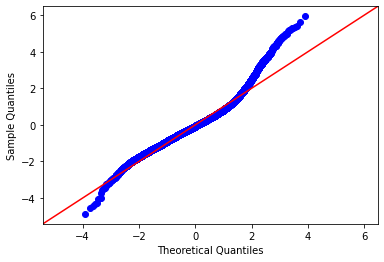

In [63]:
tt_split(df_model3, df_model3.drop('price', axis=1))

- MSEs of Train and Test samples are very close (0.7%)
    - this is not a large change from model 2 (1%)

# Model 4

Removing 'sqft_basement'

In [64]:
df_model4 = df_model3

In [65]:
df_model4.drop('sqft_basement', axis=1, inplace=True)

In [66]:
summary(df_model4, df_model4.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2948.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:21   Log-Likelihood:            -2.7182e+05
No. Observations:               20648   AIC:                         5.437e+05
Df Residuals:                   20630   BIC:                         5.438e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.919e+06   1.86e+06     -3.713      0.000   -1.06e+07   -3.27e+06
bedrooms       -1.25e+04   1319.662     -9.475      0.000   -1.51e+04   -9916.714
bathrooms      2.687e+04   2111.715     12.727      0.000    2.27e+04     3.1e+04
sqft_living      70.8839      1.426     49.701      0.000      68.088      73.679
sqft_lot          0.2064      0.031      6.600      0.000       0.145       0.268
floors         3.358e+04   2086.562     16.095      0.000    2.95e+04    3.77e+04
waterfront      1.39e+05   1.43e+04      9.743      0.000    1.11e+05    1.67e+05
view           3.773e+04   1418.375     26.599      0.000    3.49e+04    4.05e+04
condition      2.757e+04   1504.880     18.319      0.000    2.46e+04    3.05e+04
grade          7.995e+04   1402.327     57.013      0.000    7.72e+04    8.27e+04
yr_built      -2004.8522     46.503    -43.113      0.000   -2096.001   -1913.703
yr_renovated     15.6923      2.371      6.618      0.000      11.044      20.340
zipcode        -266.7930     21.262    -12.548      0.000    -308.469    -225.117
lat            5.583e+05   6776.301     82.386      0.000    5.45e+05    5.72e+05
long          -8.152e+04   8264.322     -9.864      0.000   -9.77e+04   -6.53e+04
sqft_living15    60.6608      1.411     42.998      0.000      57.896      63.426
sqft_lot15       -0.1657      0.048     -3.472      0.001      -0.259      -0.072
rel_living      -10.2252      1.297     -7.882      0.000     -12.768      -7.682
month         -2360.5845    282.461     -8.357      0.000   -2914.229   -1806.940
==============================================================================
Omnibus:                     2978.339   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7720.306
Skew:                           0.807   Prob(JB):                         0.00
Kurtosis:                       5.524   Cond. No.                     5.63e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.59e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 125954.33308806717 
Test MSE: 127086.3287324191 
Test Difference: 1131.9956443519332


(None, None)

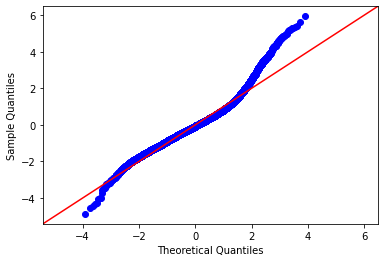

In [67]:
tt_split(df_model4, df_model4.drop('price', axis=1))

# Model 5

**Steps Taken For New Model**
- Create dummy variables for categorical data
- Remove 'condition' column (conveys same information as 'grade')

In [68]:
df_model5 = df_model4.drop('condition', axis=1)

In [69]:
df_model5['view'] = df_model5['view'].astype(int)

In [70]:
view_dummies = pd.get_dummies(df_model5['view'], prefix = 'view_', drop_first=True)
grade_dummies = pd.get_dummies(df_model5['grade'], prefix = 'grade_', drop_first=True)

In [71]:
df_model5 = pd.concat([df_model5, view_dummies, grade_dummies], axis=1)

In [72]:
df_model5.drop(columns=['view', 'grade'], inplace=True)

In [73]:
summary(df_model5, df_model5.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1849.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:21   Log-Likelihood:            -2.7185e+05
No. Observations:               20648   AIC:                         5.438e+05
Df Residuals:                   20620   BIC:                         5.440e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.101e+06   1.86e+06     -0.593      0.553   -4.74e+06    2.54e+06
bedrooms      -8795.8467   1342.488     -6.552      0.000   -1.14e+04   -6164.465
bathrooms      3.274e+04   2126.490     15.396      0.000    2.86e+04    3.69e+04
sqft_living      66.0988      1.464     45.152      0.000      63.229      68.968
sqft_lot          0.1902      0.031      6.067      0.000       0.129       0.252
floors         2.673e+04   2099.564     12.732      0.000    2.26e+04    3.08e+04
waterfront     1.229e+05   1.52e+04      8.096      0.000    9.31e+04    1.53e+05
yr_built      -2198.8690     44.859    -49.017      0.000   -2286.797   -2110.941
yr_renovated     10.5192      2.356      4.465      0.000       5.901      15.137
zipcode        -324.9638     21.230    -15.307      0.000    -366.577    -283.351
lat            5.583e+05   6800.239     82.101      0.000    5.45e+05    5.72e+05
long          -8.972e+04   8311.349    -10.794      0.000   -1.06e+05   -7.34e+04
sqft_living15    54.5564      1.446     37.727      0.000      51.722      57.391
sqft_lot15       -0.1503      0.048     -3.144      0.002      -0.244      -0.057
rel_living      -11.5428      1.300     -8.879      0.000     -14.091      -8.995
month         -2191.2291    282.790     -7.749      0.000   -2745.520   -1636.938
view__1        8.358e+04   7538.609     11.087      0.000    6.88e+04    9.84e+04
view__2          6.6e+04   4523.919     14.588      0.000    5.71e+04    7.49e+04
view__3        1.043e+05   6548.812     15.929      0.000    9.15e+04    1.17e+05
view__4        1.833e+05   1.03e+04     17.729      0.000    1.63e+05    2.04e+05
grade__4      -1.946e+05   1.29e+05     -1.511      0.131   -4.47e+05    5.79e+04
grade__5       -1.79e+05   1.27e+05     -1.412      0.158   -4.27e+05    6.95e+04
grade__6      -1.422e+05   1.27e+05     -1.124      0.261    -3.9e+05    1.06e+05
grade__7      -8.155e+04   1.27e+05     -0.644      0.519    -3.3e+05    1.66e+05
grade__8      -4304.5009   1.27e+05     -0.034      0.973   -2.52e+05    2.44e+05
grade__9       1.069e+05   1.27e+05      0.844      0.399   -1.41e+05    3.55e+05
grade__10      1.863e+05   1.27e+05      1.470      0.142   -6.21e+04    4.35e+05
grade__11      2.599e+05   1.27e+05      2.047      0.041     1.1e+04    5.09e+05
grade__12      2.674e+05   1.33e+05      2.012      0.044    6913.965    5.28e+05
==============================================================================
Omnibus:                     2788.026   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7340.372
Skew:                           0.755   Prob(JB):                         0.00
Kurtosis:                       5.500   Cond. No.                     1.01e+16
================================================================

Train MSE: 125993.29901809372 
Test MSE: 127610.16300576698 
Test Difference: 1616.8639876732632


(None, None)

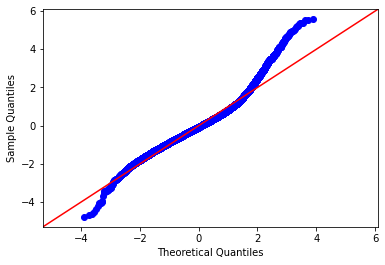

In [74]:
tt_split(df_model5, df_model5.drop('price', axis=1))

# Model 6

In [75]:
df_model6 = df_model5.drop(['grade__4', 'grade__5', 'grade__6', 'grade__7', 'grade__8', 'grade__9', 'grade__10'], axis=1)

In [76]:
summary(df_model6, df_model6.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2002.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:22   Log-Likelihood:            -2.7341e+05
No. Observations:               20648   AIC:                         5.469e+05
Df Residuals:                   20627   BIC:                         5.470e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.178e+06   1.99e+06     -4.109      0.000   -1.21e+07   -4.28e+06
bedrooms      -1.959e+04   1419.189    -13.801      0.000   -2.24e+04   -1.68e+04
bathrooms      3.663e+04   2270.998     16.128      0.000    3.22e+04    4.11e+04
sqft_living     110.5408      1.338     82.612      0.000     107.918     113.164
sqft_lot          0.2311      0.034      6.843      0.000       0.165       0.297
floors         4.953e+04   2207.422     22.439      0.000    4.52e+04    5.39e+04
waterfront     1.067e+05   1.64e+04      6.517      0.000    7.46e+04    1.39e+05
yr_built      -1652.0711     46.558    -35.484      0.000   -1743.328   -1560.814
yr_renovated     15.0089      2.537      5.916      0.000      10.036      19.981
zipcode        -354.2938     22.814    -15.530      0.000    -399.011    -309.576
lat            6.102e+05   7232.622     84.371      0.000    5.96e+05    6.24e+05
long          -1.404e+05   8864.005    -15.842      0.000   -1.58e+05   -1.23e+05
sqft_living15    97.5002      1.334     73.091      0.000      94.886     100.115
sqft_lot15       -0.2018      0.052     -3.916      0.000      -0.303      -0.101
rel_living      -13.0330      1.400     -9.312      0.000     -15.776     -10.290
month         -2135.4127    304.937     -7.003      0.000   -2733.112   -1537.713
view__1        8.257e+04   8123.793     10.164      0.000    6.66e+04    9.85e+04
view__2        7.491e+04   4871.643     15.377      0.000    6.54e+04    8.45e+04
view__3        1.158e+05   7055.870     16.416      0.000    1.02e+05     1.3e+05
view__4        1.974e+05   1.11e+04     17.714      0.000    1.76e+05    2.19e+05
grade__11      1.047e+05   9747.579     10.739      0.000    8.56e+04    1.24e+05
grade__12      7.517e+04   4.33e+04      1.735      0.083   -9730.178     1.6e+05
==============================================================================
Omnibus:                     2727.929   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6666.706
Skew:                           0.763   Prob(JB):                         0.00
Kurtosis:                       5.328   Cond. No.                     5.80e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 135826.20386036564 
Test MSE: 137851.69522886112 
Test Difference: 2025.4913684954809


(None, None)

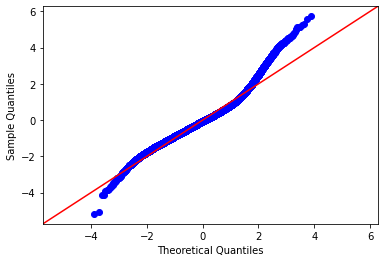

In [77]:
tt_split(df_model6, df_model6.drop('price', axis=1))

In [78]:
df_model7 = df_model6.drop('grade__12', axis=1)

In [79]:
summary(df_model7, df_model7.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2107.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:22   Log-Likelihood:            -2.7341e+05
No. Observations:               20648   AIC:                         5.469e+05
Df Residuals:                   20628   BIC:                         5.470e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.176e+06   1.99e+06     -4.108      0.000   -1.21e+07   -4.28e+06
bedrooms      -1.966e+04   1418.627    -13.858      0.000   -2.24e+04   -1.69e+04
bathrooms      3.663e+04   2271.109     16.128      0.000    3.22e+04    4.11e+04
sqft_living     110.6851      1.336     82.870      0.000     108.067     113.303
sqft_lot          0.2307      0.034      6.831      0.000       0.165       0.297
floors         4.948e+04   2207.290     22.415      0.000    4.51e+04    5.38e+04
waterfront     1.064e+05   1.64e+04      6.500      0.000    7.43e+04    1.38e+05
yr_built      -1652.1753     46.560    -35.485      0.000   -1743.436   -1560.914
yr_renovated     14.9832      2.537      5.906      0.000      10.010      19.956
zipcode        -354.4907     22.815    -15.538      0.000    -399.210    -309.771
lat            6.102e+05   7232.974     84.366      0.000    5.96e+05    6.24e+05
long          -1.406e+05   8864.036    -15.858      0.000   -1.58e+05   -1.23e+05
sqft_living15    97.6237      1.332     73.291      0.000      95.013     100.234
sqft_lot15       -0.2017      0.052     -3.913      0.000      -0.303      -0.101
rel_living      -13.0488      1.400     -9.322      0.000     -15.792     -10.305
month         -2136.7574    304.950     -7.007      0.000   -2734.484   -1539.030
view__1        8.244e+04   8123.849     10.148      0.000    6.65e+04    9.84e+04
view__2        7.505e+04   4871.237     15.407      0.000    6.55e+04    8.46e+04
view__3        1.159e+05   7056.193     16.420      0.000    1.02e+05     1.3e+05
view__4        1.977e+05   1.11e+04     17.743      0.000    1.76e+05     2.2e+05
grade__11      1.042e+05   9744.196     10.694      0.000    8.51e+04    1.23e+05
==============================================================================
Omnibus:                     2723.205   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6616.030
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       5.314   Cond. No.                     5.81e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.17e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 135826.4901361906 
Test MSE: 137834.39299181724 
Test Difference: 2007.9028556266276


(None, None)

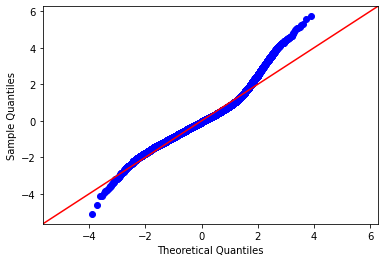

In [80]:
tt_split(df_model7, df_model7.drop('price', axis=1))

# Adding Corresponding Cities to Zipcodes

### Initial Cleaning

In [81]:
kc_zip = pd.read_csv('data/kc_zip.csv')

In [82]:
kc_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               261 non-null    float64
 1   Y               261 non-null    float64
 2   OBJECTID        261 non-null    int64  
 3   ZIP             261 non-null    int64  
 4   ZIPCODE         261 non-null    int64  
 5   COUNTY          260 non-null    float64
 6   ZIP_TYPE        261 non-null    object 
 7   PREFERRED_CITY  261 non-null    object 
 8   FEATURE_SOURCE  261 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 18.5+ KB


In [83]:
kc_zip.drop(['X', 'Y', 'OBJECTID', 'ZIP', 'COUNTY', 'ZIP_TYPE', 'FEATURE_SOURCE'], axis=1, inplace=True )

kc_zip['zipcode'] = kc_zip['ZIPCODE']
kc_zip.drop('ZIPCODE', axis=1, inplace=True)

kc_zip['city'] = kc_zip['PREFERRED_CITY']
kc_zip.drop('PREFERRED_CITY', axis=1, inplace=True)

# kc_zip

In [84]:
kc_zip[(kc_zip['city'] == 'SAMMAMIISH')]

,zipcode,city
109,98075,SAMMAMIISH


In [85]:
df_model7[(df_model7['zipcode'] == 98075)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,yr_renovated,zipcode,...,long,sqft_living15,sqft_lot15,rel_living,month,view__1,view__2,view__3,view__4,grade__11
75,832500.0,4,4.00,3430,35102,2.0,0.0,1986,0.0,98075,...,-121.987,3240,35020,-190,11,0,0,0,0,0
162,900000.0,3,2.50,3400,16603,2.0,0.0,2000,0.0,98075,...,-122.023,3400,12601,0,3,0,0,0,0,0
220,686000.0,4,2.50,2760,6440,2.0,0.0,1999,0.0,98075,...,-122.026,3070,8127,310,8,0,0,0,0,0
295,879000.0,4,2.50,3360,22111,2.0,0.0,1994,0.0,98075,...,-122.017,3150,11374,-210,7,0,0,0,0,0
368,785000.0,4,2.75,2440,69415,1.0,0.0,1989,0.0,98075,...,-122.042,2770,24361,330,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21408,890000.0,5,3.25,4100,7578,2.0,0.0,2011,0.0,98075,...,-121.974,3710,8156,-390,8,0,1,0,0,0
21425,914500.0,4,2.50,3950,10856,3.0,0.0,2013,0.0,98075,...,-121.996,3200,10856,-750,5,0,0,0,0,0
21472,890776.0,5,2.75,3170,8093,2.0,0.0,2014,0.0,98075,...,-122.060,3210,7062,40,8,0,0,0,0,0
21485,1150000.0,5,4.25,4010,8252,2.0,0.0,2015,0.0,98075,...,-122.013,3370,8252,-640,2,0,0,0,0,0


In [86]:
kc_zip.replace(to_replace='SAMMAMIISH', value='SAMMAMISH', inplace=True)

In [87]:
zip_list = df_model7['zipcode'].unique().tolist()
# len(zip_list)

In [88]:
for index, contents in kc_zip.iterrows():
    if contents['zipcode'] not in zip_list:
        kc_zip.drop(labels=[index], inplace=True)
        
# kc_zip

In [89]:
kc_zip.duplicated().sum()

4

In [90]:
kc_zip.drop_duplicates(keep='first')

,zipcode,city
57,98001,AUBURN
58,98002,AUBURN
59,98003,FEDERAL WAY
60,98004,BELLEVUE
61,98005,BELLEVUE
...,...,...
147,98177,SEATTLE
148,98178,SEATTLE
149,98188,SEATTLE
151,98198,SEATTLE


In [91]:
merged = pd.merge(df_model7, kc_zip, how='left')

# merged

In [92]:
merged['city'].value_counts()

SEATTLE          8601
RENTON           1567
AUBURN           1249
BELLEVUE         1190
KENT             1190
REDMOND           958
WOODINVILLE       918
KIRKLAND          917
SAMMAMISH         768
FEDERAL WAY       764
ISSAQUAH          715
MAPLE VALLEY      583
ENUMCLAW          464
SNOQUALMIE        303
KENMORE           280
NORTH BEND        216
MERCER ISLAND     205
BOTHELL           193
DUVALL            190
CARNATION         120
VASHON            115
BLACK DIAMOND      99
FALL CITY          71
MEDINA             11
Name: city, dtype: int64

In [93]:
merged['city'].value_counts(normalize=True)

SEATTLE          0.396597
RENTON           0.072255
AUBURN           0.057592
BELLEVUE         0.054872
KENT             0.054872
REDMOND          0.044174
WOODINVILLE      0.042330
KIRKLAND         0.042283
SAMMAMISH        0.035413
FEDERAL WAY      0.035228
ISSAQUAH         0.032969
MAPLE VALLEY     0.026882
ENUMCLAW         0.021395
SNOQUALMIE       0.013972
KENMORE          0.012911
NORTH BEND       0.009960
MERCER ISLAND    0.009453
BOTHELL          0.008899
DUVALL           0.008761
CARNATION        0.005533
VASHON           0.005303
BLACK DIAMOND    0.004565
FALL CITY        0.003274
MEDINA           0.000507
Name: city, dtype: float64

40% of properties in data set are within Seattle 

In [94]:
merged.shape[0] - df_model7.shape[0]

1039

In [95]:
merged.duplicated().sum()

1041

In [96]:
merged.drop_duplicates(keep='first', inplace=True)

In [97]:
merged.shape

(20646, 22)

In [98]:
merged.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
rel_living       0
month            0
view__1          0
view__2          0
view__3          0
view__4          0
grade__11        0
city             0
dtype: int64

Lost 2 data points from the cleaning process

In [99]:
merged['city'] = merged['city'].str.replace(' ', '_')

# merged

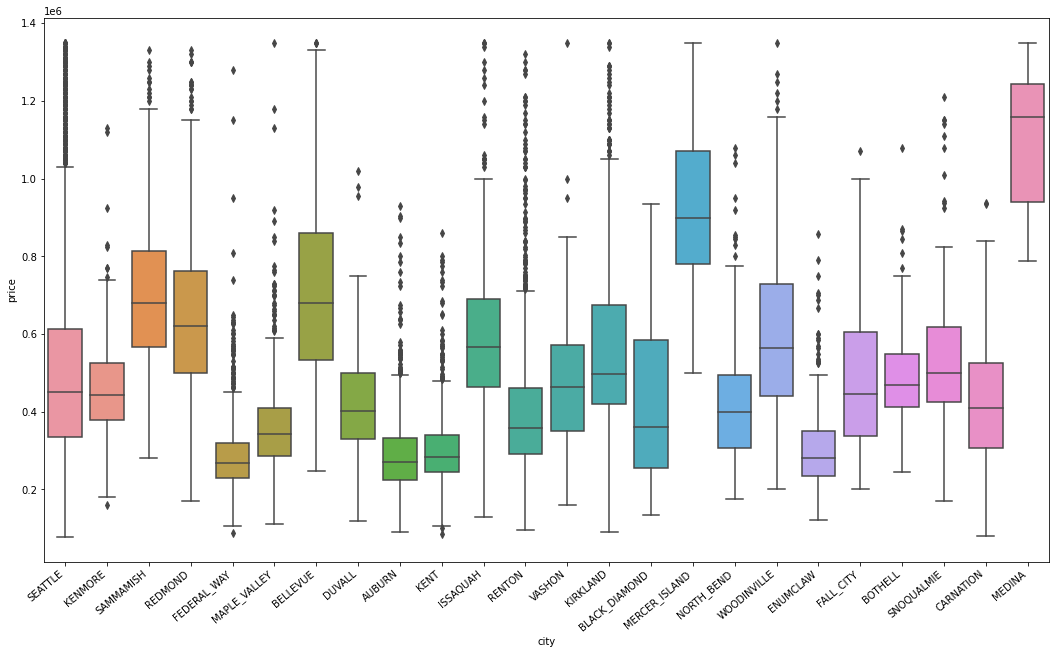

In [100]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='city', y = 'price', data= merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

- There are still a lot of outliers
- I think it will be beneficial exploring the behavior of my model by removing more outliers 
    - removed 70 datapoints after baseline at this point
- I think I will create another model with all categories including cities to see how they change relationships of other features 

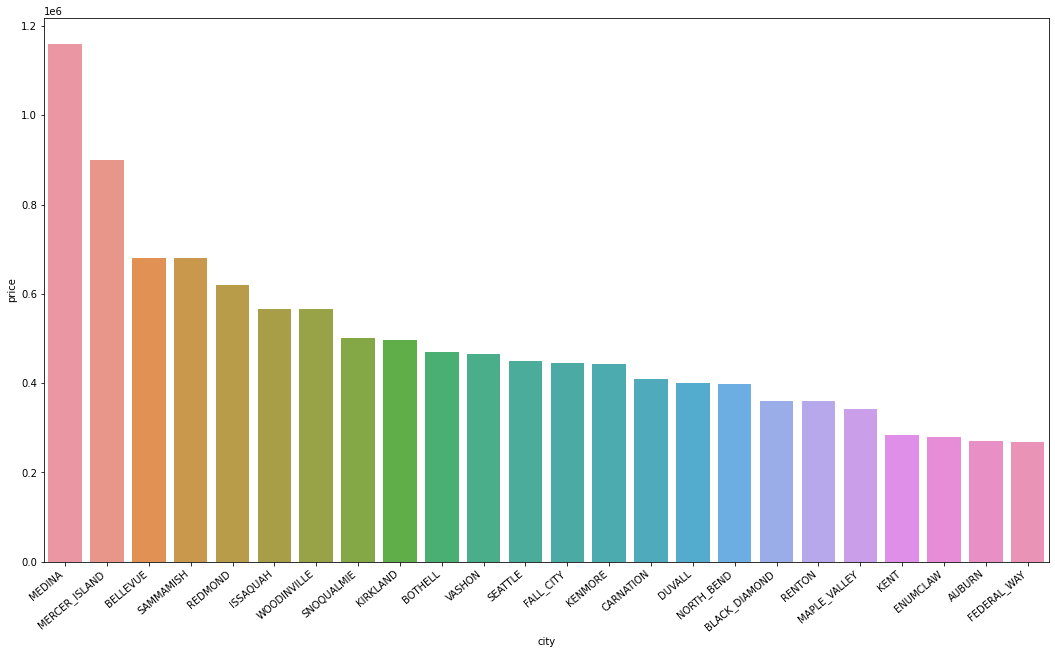

In [101]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(ax=ax, x='city', y = 'price', data= merged.groupby('city').median().reset_index().sort_values(by='price', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

# Model 8

In [102]:
df_model8 = merged

In [103]:
city_dummies = pd.get_dummies(df_model8['city'], drop_first=True)
df_model8 = pd.concat([df_model8, city_dummies], axis=1)
df_model8.drop('city', axis=1, inplace=True)

In [104]:
df_model8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20646 entries, 0 to 21686
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20646 non-null  float64
 1   bedrooms       20646 non-null  int64  
 2   bathrooms      20646 non-null  float64
 3   sqft_living    20646 non-null  int64  
 4   sqft_lot       20646 non-null  int64  
 5   floors         20646 non-null  float64
 6   waterfront     20646 non-null  float64
 7   yr_built       20646 non-null  int64  
 8   yr_renovated   20646 non-null  float64
 9   zipcode        20646 non-null  int64  
 10  lat            20646 non-null  float64
 11  long           20646 non-null  float64
 12  sqft_living15  20646 non-null  int64  
 13  sqft_lot15     20646 non-null  int64  
 14  rel_living     20646 non-null  int64  
 15  month          20646 non-null  int64  
 16  view__1        20646 non-null  uint8  
 17  view__2        20646 non-null  uint8  
 18  view__

In [105]:
summary(df_model8, df_model8.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1348.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:24   Log-Likelihood:            -2.7088e+05
No. Observations:               20646   AIC:                         5.418e+05
Df Residuals:                   20603   BIC:                         5.422e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.172e+07   5.44e+06      9.513      0.000    4.11e+07    6.24e+07
bedrooms      -1.803e+04   1265.744    -14.245      0.000   -2.05e+04   -1.55e+04
bathrooms      2.952e+04   2021.861     14.601      0.000    2.56e+04    3.35e+04
sqft_living     109.2162      1.209     90.360      0.000     106.847     111.585
sqft_lot          0.2717      0.030      9.040      0.000       0.213       0.331
floors          4.05e+04   2043.441     19.820      0.000    3.65e+04    4.45e+04
waterfront     1.259e+05   1.47e+04      8.545      0.000     9.7e+04    1.55e+05
yr_built      -1098.3727     43.419    -25.297      0.000   -1183.477   -1013.268
yr_renovated     14.5747      2.252      6.472      0.000      10.161      18.989
zipcode       -1093.8732     44.774    -24.431      0.000   -1181.634   -1006.113
lat            4.865e+05   1.36e+04     35.851      0.000     4.6e+05    5.13e+05
long          -2.825e+05   2.05e+04    -13.751      0.000   -3.23e+05   -2.42e+05
sqft_living15    92.9531      1.259     73.842      0.000      90.486      95.420
sqft_lot15       -0.0351      0.047     -0.746      0.456      -0.127       0.057
rel_living      -16.2631      1.258    -12.925      0.000     -18.729     -13.797
month         -2247.6088    270.547     -8.308      0.000   -2777.903   -1717.314
view__1         6.12e+04   7229.347      8.466      0.000     4.7e+04    7.54e+04
view__2        6.341e+04   4352.281     14.571      0.000    5.49e+04    7.19e+04
view__3        1.037e+05   6303.481     16.458      0.000    9.14e+04    1.16e+05
view__4        1.822e+05   9903.234     18.394      0.000    1.63e+05    2.02e+05
grade__11      1.002e+05   8651.382     11.582      0.000    8.32e+04    1.17e+05
BELLEVUE       1.722e+05   6819.274     25.252      0.000    1.59e+05    1.86e+05
BLACK_DIAMOND   1.02e+05   1.37e+04      7.460      0.000    7.52e+04    1.29e+05
BOTHELL       -1.081e+05   1.13e+04     -9.590      0.000    -1.3e+05    -8.6e+04
CARNATION      -494.7752   1.51e+04     -0.033      0.974      -3e+04    2.91e+04
DUVALL        -7.524e+04   1.26e+04     -5.971      0.000   -9.99e+04   -5.05e+04
ENUMCLAW       1.015e+05   1.02e+04      9.929      0.000    8.15e+04    1.22e+05
FALL_CITY      9.471e+04   1.67e+04      5.662      0.000    6.19e+04    1.27e+05
FEDERAL_WAY   -6.718e+04   6515.902    -10.310      0.000   -7.99e+04   -5.44e+04
ISSAQUAH       1.341e+05   7967.034     16.831      0.000    1.18e+05     1.5e+05
KENMORE       -1.093e+05   1.02e+04    -10.701      0.000   -1.29e+05   -8.93e+04
KENT          -6958.5734   5549.912     -1.254      0.210   -1.78e+04    3919.694
KIRKLAND       6.625e+04   7849.098      8.441      0.000    5.09e+04    8.16e+04
MAPLE_VALLEY   5.261e+04   7564.599      6.955      0.000    3.78e+04    6.74e+04
MEDINA         5.208e+05    3.7e+04     14.076   

# Model 9

In [106]:
df_model9 = df_model8.drop(['VASHON', 'WOODINVILLE', 'sqft_lot15', 'zipcode', 'lat', 'long'], axis=1)

In [107]:
summary(df_model9, df_model9.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1251.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:25   Log-Likelihood:            -2.7256e+05
No. Observations:               20646   AIC:                         5.452e+05
Df Residuals:                   20609   BIC:                         5.455e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.865e+06   8.97e+04     31.937      0.000    2.69e+06    3.04e+06
bedrooms      -2.217e+04   1368.686    -16.196      0.000   -2.48e+04   -1.95e+04
bathrooms      3.683e+04   2185.458     16.852      0.000    3.25e+04    4.11e+04
sqft_living     108.5839      1.295     83.819      0.000     106.045     111.123
sqft_lot          0.2320      0.025      9.432      0.000       0.184       0.280
floors         5.716e+04   2172.626     26.309      0.000    5.29e+04    6.14e+04
waterfront     1.004e+05   1.58e+04      6.372      0.000    6.95e+04    1.31e+05
yr_built      -1503.8808     46.149    -32.587      0.000   -1594.337   -1413.425
yr_renovated     10.4953      2.441      4.300      0.000       5.711      15.280
sqft_living15    94.1256      1.334     70.557      0.000      91.511      96.740
rel_living      -14.4583      1.361    -10.625      0.000     -17.126     -11.791
month         -2009.6853    293.416     -6.849      0.000   -2584.803   -1434.567
view__1        4.655e+04   7816.334      5.955      0.000    3.12e+04    6.19e+04
view__2        5.141e+04   4705.148     10.926      0.000    4.22e+04    6.06e+04
view__3        8.603e+04   6801.489     12.649      0.000    7.27e+04    9.94e+04
view__4        1.612e+05   1.07e+04     15.032      0.000     1.4e+05    1.82e+05
grade__11      1.045e+05   9378.933     11.147      0.000    8.62e+04    1.23e+05
BELLEVUE       2.616e+05   5204.303     50.264      0.000    2.51e+05    2.72e+05
BLACK_DIAMOND  1.911e+04   1.36e+04      1.402      0.161   -7608.512    4.58e+04
BOTHELL        6.827e+04   1.01e+04      6.784      0.000    4.85e+04     8.8e+04
CARNATION      3.403e+04   1.25e+04      2.712      0.007    9436.422    5.86e+04
DUVALL         1.382e+04   1.01e+04      1.366      0.172   -6018.610    3.37e+04
ENUMCLAW      -5.195e+04   9385.066     -5.535      0.000   -7.03e+04   -3.36e+04
FALL_CITY      7.606e+04    1.6e+04      4.756      0.000    4.47e+04    1.07e+05
FEDERAL_WAY   -6.793e+04   5881.843    -11.550      0.000   -7.95e+04   -5.64e+04
ISSAQUAH       1.347e+05   6020.350     22.380      0.000    1.23e+05    1.47e+05
KENMORE        6.249e+04   8569.424      7.293      0.000    4.57e+04    7.93e+04
KENT          -5.024e+04   5139.193     -9.777      0.000   -6.03e+04   -4.02e+04
KIRKLAND       1.938e+05   5557.476     34.879      0.000    1.83e+05    2.05e+05
MAPLE_VALLEY   -3.47e+04   6451.280     -5.379      0.000   -4.73e+04   -2.21e+04
MEDINA         6.094e+05   3.98e+04     15.327      0.000    5.31e+05    6.87e+05
MERCER_ISLAND  3.868e+05   9898.939     39.072      0.000    3.67e+05    4.06e+05
NORTH_BEND     5.433e+04   9579.805      5.671      0.000    3.55e+04    7.31e+04
REDMOND        1.864e+05   5495.152     33.923      0.000    1.76e+05    1.97e+05
RENTON         1.258e+04   4783.572      2.630   

Train MSE: 130889.47867884452 
Test MSE: 131336.72328210235 
Test Difference: 447.24460325783


(None, None)

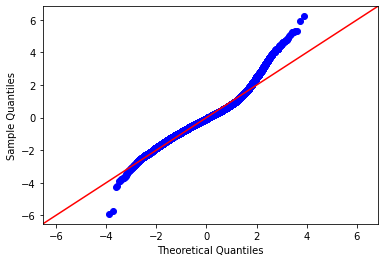

In [108]:
tt_split(df_model9, df_model9.drop('price', axis=1))

The MSE of the training data is higher than the testing data

In [109]:
df_model9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20646 entries, 0 to 21686
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20646 non-null  float64
 1   bedrooms       20646 non-null  int64  
 2   bathrooms      20646 non-null  float64
 3   sqft_living    20646 non-null  int64  
 4   sqft_lot       20646 non-null  int64  
 5   floors         20646 non-null  float64
 6   waterfront     20646 non-null  float64
 7   yr_built       20646 non-null  int64  
 8   yr_renovated   20646 non-null  float64
 9   sqft_living15  20646 non-null  int64  
 10  rel_living     20646 non-null  int64  
 11  month          20646 non-null  int64  
 12  view__1        20646 non-null  uint8  
 13  view__2        20646 non-null  uint8  
 14  view__3        20646 non-null  uint8  
 15  view__4        20646 non-null  uint8  
 16  grade__11      20646 non-null  uint8  
 17  BELLEVUE       20646 non-null  uint8  
 18  BLACK_

# Adding Cities to Baseline

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21357 non-null  int64  
 1   price          21357 non-null  float64
 2   bedrooms       21357 non-null  int64  
 3   bathrooms      21357 non-null  float64
 4   sqft_living    21357 non-null  int64  
 5   sqft_lot       21357 non-null  int64  
 6   floors         21357 non-null  float64
 7   waterfront     21357 non-null  float64
 8   view           21357 non-null  float64
 9   condition      21357 non-null  int64  
 10  grade          21357 non-null  int64  
 11  sqft_basement  21357 non-null  float64
 12  yr_built       21357 non-null  int64  
 13  yr_renovated   21357 non-null  float64
 14  zipcode        21357 non-null  int64  
 15  lat            21357 non-null  float64
 16  long           21357 non-null  float64
 17  sqft_living15  21357 non-null  int64  
 18  sqft_l

In [111]:
cities_baseline = df[(df['price'] <= 1350000)]
cities_baseline = cities_baseline[(cities_baseline['bedrooms'] < 8)]
cities_baseline = cities_baseline[(cities_baseline['bathrooms'] > 0.5)]

In [112]:
cities_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20648 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20648 non-null  int64  
 1   price          20648 non-null  float64
 2   bedrooms       20648 non-null  int64  
 3   bathrooms      20648 non-null  float64
 4   sqft_living    20648 non-null  int64  
 5   sqft_lot       20648 non-null  int64  
 6   floors         20648 non-null  float64
 7   waterfront     20648 non-null  float64
 8   view           20648 non-null  float64
 9   condition      20648 non-null  int64  
 10  grade          20648 non-null  int64  
 11  sqft_basement  20648 non-null  float64
 12  yr_built       20648 non-null  int64  
 13  yr_renovated   20648 non-null  float64
 14  zipcode        20648 non-null  int64  
 15  lat            20648 non-null  float64
 16  long           20648 non-null  float64
 17  sqft_living15  20648 non-null  int64  
 18  sqft_l

In [113]:
kc_zip.duplicated().sum()

4

In [114]:
kc_zip.drop_duplicates(keep='first', inplace=True)

In [115]:
cities_baseline = pd.merge(cities_baseline, kc_zip, how='left')
 # cities_baseline.info()

In [116]:
cities_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20648 entries, 0 to 20647
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20648 non-null  int64  
 1   price          20648 non-null  float64
 2   bedrooms       20648 non-null  int64  
 3   bathrooms      20648 non-null  float64
 4   sqft_living    20648 non-null  int64  
 5   sqft_lot       20648 non-null  int64  
 6   floors         20648 non-null  float64
 7   waterfront     20648 non-null  float64
 8   view           20648 non-null  float64
 9   condition      20648 non-null  int64  
 10  grade          20648 non-null  int64  
 11  sqft_basement  20648 non-null  float64
 12  yr_built       20648 non-null  int64  
 13  yr_renovated   20648 non-null  float64
 14  zipcode        20648 non-null  int64  
 15  lat            20648 non-null  float64
 16  long           20648 non-null  float64
 17  sqft_living15  20648 non-null  int64  
 18  sqft_l

In [117]:
cities_baseline['city'] = cities_baseline['city'].str.replace(' ', '_')
city_dummies = pd.get_dummies(cities_baseline['city'], drop_first=True)

In [118]:
cities_baseline = pd.concat([cities_baseline, city_dummies], axis=1)
cities_baseline.drop('city', axis=1, inplace=True)

In [119]:
cities_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20648 entries, 0 to 20647
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20648 non-null  int64  
 1   price          20648 non-null  float64
 2   bedrooms       20648 non-null  int64  
 3   bathrooms      20648 non-null  float64
 4   sqft_living    20648 non-null  int64  
 5   sqft_lot       20648 non-null  int64  
 6   floors         20648 non-null  float64
 7   waterfront     20648 non-null  float64
 8   view           20648 non-null  float64
 9   condition      20648 non-null  int64  
 10  grade          20648 non-null  int64  
 11  sqft_basement  20648 non-null  float64
 12  yr_built       20648 non-null  int64  
 13  yr_renovated   20648 non-null  float64
 14  zipcode        20648 non-null  int64  
 15  lat            20648 non-null  float64
 16  long           20648 non-null  float64
 17  sqft_living15  20648 non-null  int64  
 18  sqft_l

In [120]:
cities_baseline

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,MEDINA,MERCER_ISLAND,NORTH_BEND,REDMOND,RENTON,SAMMAMISH,SEATTLE,SNOQUALMIE,VASHON,WOODINVILLE
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
20644,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
20645,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
20646,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [121]:
cities_baseline.drop(['id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [122]:
summary(cities_baseline, cities_baseline.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1517.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:26   Log-Likelihood:            -2.7077e+05
No. Observations:               20648   AIC:                         5.416e+05
Df Residuals:                   20609   BIC:                         5.419e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.954e+06   8.95e+04     33.006      0.000    2.78e+06    3.13e+06
bedrooms      -1.361e+04   1262.014    -10.781      0.000   -1.61e+04   -1.11e+04
bathrooms      2.768e+04   2039.352     13.573      0.000    2.37e+04    3.17e+04
sqft_living      70.8176      1.475     48.012      0.000      67.926      73.709
sqft_lot          0.2297      0.030      7.693      0.000       0.171       0.288
floors         3.866e+04   2268.268     17.046      0.000    3.42e+04    4.31e+04
waterfront     1.222e+05   1.38e+04      8.874      0.000    9.52e+04    1.49e+05
view           2.924e+04   1372.118     21.307      0.000    2.65e+04    3.19e+04
condition      2.548e+04   1453.471     17.532      0.000    2.26e+04    2.83e+04
grade          7.545e+04   1365.541     55.256      0.000    7.28e+04    7.81e+04
sqft_basement    -4.0413      2.757     -1.466      0.143      -9.445       1.363
yr_built      -1822.9388     45.725    -39.868      0.000   -1912.562   -1733.315
yr_renovated     11.7006      2.258      5.182      0.000       7.275      16.127
sqft_living15    57.7475      1.399     41.287      0.000      55.006      60.489
sqft_lot15       -0.1258      0.047     -2.702      0.007      -0.217      -0.035
rel_living      -13.0700      1.324     -9.869      0.000     -15.666     -10.474
month         -2211.8902    268.790     -8.229      0.000   -2738.739   -1685.041
BELLEVUE       2.921e+05   5448.325     53.614      0.000    2.81e+05    3.03e+05
BLACK_DIAMOND  9.442e+04   1.28e+04      7.398      0.000    6.94e+04    1.19e+05
BOTHELL        1.331e+05   9561.094     13.925      0.000    1.14e+05    1.52e+05
CARNATION      1.247e+05   1.18e+04     10.524      0.000    1.01e+05    1.48e+05
DUVALL         1.052e+05   9635.776     10.917      0.000    8.63e+04    1.24e+05
ENUMCLAW       9243.8442   8984.726      1.029      0.304   -8366.929    2.69e+04
FALL_CITY       1.58e+05   1.49e+04     10.580      0.000    1.29e+05    1.87e+05
FEDERAL_WAY   -1.919e+04   5935.020     -3.233      0.001   -3.08e+04   -7552.039
ISSAQUAH       1.828e+05   6084.732     30.040      0.000    1.71e+05    1.95e+05
KENMORE        1.236e+05   8242.369     15.001      0.000    1.07e+05     1.4e+05
KENT           1.096e+04   5311.059      2.064      0.039     553.961    2.14e+04
KIRKLAND       2.432e+05   5666.604     42.912      0.000    2.32e+05    2.54e+05
MAPLE_VALLEY   4.616e+04   6421.818      7.188      0.000    3.36e+04    5.88e+04
MEDINA         6.614e+05   3.65e+04     18.128      0.000     5.9e+05    7.33e+05
MERCER_ISLAND  4.068e+05   9470.495     42.958      0.000    3.88e+05    4.25e+05
NORTH_BEND     1.157e+05   9132.054     12.673      0.000    9.78e+04    1.34e+05
REDMOND        2.397e+05   5652.678     42.397      0.000    2.29e+05    2.51e+05
RENTON         7.359e+04   5036.478     14.611   

Fall City appears to be the only city with a large p-value
- I am going to keep it for now while I add more dummy variables for grade and view
- I will also be dropping "condition" as it is redundant with grade 

# Model 10

In [123]:
df_model10 = cities_baseline.drop('condition', axis=1)

In [124]:
indexnames = df_model10[(df_model10['grade'] == 3)].index
df_model10 = df_model10.drop(indexnames)

#creating for later concatination 
grade_col = df_model10['grade']
view_col = df_model10['view']

'grade' = 3 offered little / confusing information for the model as there was only one corresponding datapoint

In [125]:
df_model10['view'] = df_model10['view'].astype(int)

view_dummies = pd.get_dummies(df_model10['view'], prefix='view', drop_first=True)

grade_dummies = pd.get_dummies(df_model10['grade'], prefix='grade', drop_first=True)

In [126]:
df_model10.drop(['view', 'grade'], axis=1, inplace=True)

In [127]:
df_model10 = pd.concat([df_model10, view_dummies, grade_dummies], axis=1)

In [128]:
summary(df_model10, df_model10.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:26   Log-Likelihood:            -2.7082e+05
No. Observations:               20647   AIC:                         5.417e+05
Df Residuals:                   20599   BIC:                         5.421e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.896e+06   8.82e+04     44.155      0.000    3.72e+06    4.07e+06
bedrooms      -1.171e+04   1286.699     -9.102      0.000   -1.42e+04   -9188.930
bathrooms      3.129e+04   2053.049     15.239      0.000    2.73e+04    3.53e+04
sqft_living      66.6803      1.532     43.517      0.000      63.677      69.684
sqft_lot          0.2179      0.030      7.269      0.000       0.159       0.277
floors         3.621e+04   2299.827     15.743      0.000    3.17e+04    4.07e+04
waterfront     9.889e+04   1.47e+04      6.741      0.000    7.01e+04    1.28e+05
sqft_basement     2.1787      2.801      0.778      0.437      -3.312       7.670
yr_built      -2046.6882     43.989    -46.528      0.000   -2132.909   -1960.467
yr_renovated      6.4460      2.246      2.870      0.004       2.043      10.849
sqft_living15    53.1737      1.434     37.070      0.000      50.362      55.985
sqft_lot15       -0.1136      0.047     -2.431      0.015      -0.205      -0.022
rel_living      -13.5065      1.335    -10.116      0.000     -16.123     -10.890
month         -2074.0788    269.635     -7.692      0.000   -2602.584   -1545.574
BELLEVUE       2.955e+05   5466.663     54.046      0.000    2.85e+05    3.06e+05
BLACK_DIAMOND  9.527e+04   1.28e+04      7.437      0.000    7.02e+04     1.2e+05
BOTHELL        1.286e+05   9592.637     13.409      0.000     1.1e+05    1.47e+05
CARNATION      1.134e+05   1.19e+04      9.534      0.000    9.01e+04    1.37e+05
DUVALL         1.018e+05   9665.570     10.529      0.000    8.28e+04    1.21e+05
ENUMCLAW        1.77e+04   9034.287      1.959      0.050     -10.264    3.54e+04
FALL_CITY      1.505e+05    1.5e+04     10.045      0.000    1.21e+05     1.8e+05
FEDERAL_WAY   -1.971e+04   5959.573     -3.307      0.001   -3.14e+04   -8024.675
ISSAQUAH        1.82e+05   6111.934     29.778      0.000     1.7e+05    1.94e+05
KENMORE        1.205e+05   8271.580     14.569      0.000    1.04e+05    1.37e+05
KENT           1.336e+04   5330.946      2.506      0.012    2909.118    2.38e+04
KIRKLAND        2.42e+05   5690.614     42.526      0.000    2.31e+05    2.53e+05
MAPLE_VALLEY   4.573e+04   6446.629      7.093      0.000    3.31e+04    5.84e+04
MEDINA         6.616e+05   3.66e+04     18.060      0.000     5.9e+05    7.33e+05
MERCER_ISLAND  4.133e+05   9506.200     43.472      0.000    3.95e+05    4.32e+05
NORTH_BEND      1.11e+05   9160.215     12.120      0.000    9.31e+04    1.29e+05
REDMOND        2.377e+05   5673.273     41.903      0.000    2.27e+05    2.49e+05
RENTON         7.447e+04   5056.131     14.728      0.000    6.46e+04    8.44e+04
SAMMAMISH       1.92e+05   6132.491     31.314      0.000     1.8e+05    2.04e+05
SEATTLE        1.884e+05   4452.595     42.314      0.000     1.8e+05    1.97e+05
SNOQUALMIE     1.171e+05   8115.934     14.432   

Train MSE: 120383.39470487066 
Test MSE: 120351.77956568009 
Test Difference: -31.615139190573245


(None, None)

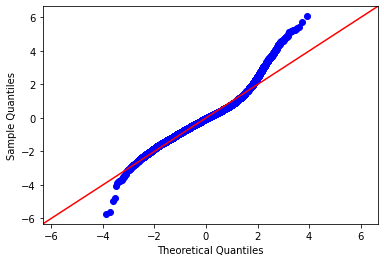

In [129]:
tt_split(df_model10, df_model10.drop('price', axis=1))

# Model 11

In [130]:
df_model11 = df_model10.drop(['ENUMCLAW', 'sqft_basement'], axis=1)

In [131]:
summary(df_model11, df_model11.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:27   Log-Likelihood:            -2.7082e+05
No. Observations:               20647   AIC:                         5.417e+05
Df Residuals:                   20601   BIC:                         5.421e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.902e+06   8.82e+04     44.249      0.000    3.73e+06    4.07e+06
bedrooms      -1.176e+04   1286.297     -9.145      0.000   -1.43e+04   -9242.436
bathrooms      3.156e+04   2029.722     15.548      0.000    2.76e+04    3.55e+04
sqft_living      67.0786      1.408     47.638      0.000      64.319      69.839
sqft_lot          0.2211      0.030      7.392      0.000       0.162       0.280
floors         3.542e+04   2053.894     17.244      0.000    3.14e+04    3.94e+04
waterfront     9.848e+04   1.47e+04      6.713      0.000    6.97e+04    1.27e+05
yr_built      -2047.9702     43.987    -46.559      0.000   -2134.188   -1961.752
yr_renovated      6.4785      2.246      2.884      0.004       2.076      10.881
sqft_living15    53.2137      1.426     37.312      0.000      50.418      56.009
sqft_lot15       -0.1085      0.047     -2.326      0.020      -0.200      -0.017
rel_living      -13.8649      1.256    -11.043      0.000     -16.326     -11.404
month         -2067.9479    269.634     -7.669      0.000   -2596.451   -1539.445
BELLEVUE       2.924e+05   5167.240     56.589      0.000    2.82e+05    3.03e+05
BLACK_DIAMOND  9.151e+04   1.27e+04      7.224      0.000    6.67e+04    1.16e+05
BOTHELL        1.255e+05   9435.378     13.298      0.000    1.07e+05    1.44e+05
CARNATION      1.094e+05   1.17e+04      9.339      0.000    8.65e+04    1.32e+05
DUVALL          9.82e+04   9487.227     10.351      0.000    7.96e+04    1.17e+05
FALL_CITY      1.465e+05   1.48e+04      9.868      0.000    1.17e+05    1.76e+05
FEDERAL_WAY   -2.295e+04   5693.384     -4.030      0.000   -3.41e+04   -1.18e+04
ISSAQUAH       1.789e+05   5843.675     30.606      0.000    1.67e+05     1.9e+05
KENMORE        1.174e+05   8082.318     14.520      0.000    1.02e+05    1.33e+05
KENT           1.002e+04   5035.917      1.989      0.047     147.505    1.99e+04
KIRKLAND       2.388e+05   5411.710     44.126      0.000    2.28e+05    2.49e+05
MAPLE_VALLEY   4.223e+04   6198.129      6.813      0.000    3.01e+04    5.44e+04
MEDINA         6.586e+05   3.66e+04     17.999      0.000    5.87e+05     7.3e+05
MERCER_ISLAND  4.103e+05   9337.494     43.937      0.000    3.92e+05    4.29e+05
NORTH_BEND     1.073e+05   8962.643     11.968      0.000    8.97e+04    1.25e+05
REDMOND        2.343e+05   5401.641     43.377      0.000    2.24e+05    2.45e+05
RENTON         7.113e+04   4747.575     14.982      0.000    6.18e+04    8.04e+04
SAMMAMISH      1.887e+05   5893.826     32.018      0.000    1.77e+05       2e+05
SEATTLE        1.855e+05   4028.436     46.035      0.000    1.78e+05    1.93e+05
SNOQUALMIE     1.136e+05   7930.324     14.330      0.000    9.81e+04    1.29e+05
VASHON         1.199e+05   1.22e+04      9.820      0.000    9.59e+04    1.44e+05
WOODINVILLE     1.55e+05   6785.904     22.849   

# Model 12

There is a strong positive relationship between 'grade' and 'price' so I do not want to drop a majority of the 'grade' columns... so I will attempt binning 

In [132]:
# df_model12 = cities_baseline.drop('condition', axis=1)

In [133]:
df_model12 = df_model11.drop(['grade_5', 'grade_6'], axis=1)

In [134]:
summary(df_model12, df_model12.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     1328.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:47:27   Log-Likelihood:            -2.7083e+05
No. Observations:               20647   AIC:                         5.417e+05
Df Residuals:                   20603   BIC:                         5.421e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.921e+06   8.55e+04     45.881      0.000    3.75e+06    4.09e+06
bedrooms      -1.161e+04   1285.391     -9.036      0.000   -1.41e+04   -9094.875
bathrooms      3.144e+04   2029.701     15.490      0.000    2.75e+04    3.54e+04
sqft_living      67.2485      1.407     47.791      0.000      64.490      70.007
sqft_lot          0.2199      0.030      7.352      0.000       0.161       0.279
floors         3.529e+04   2053.786     17.181      0.000    3.13e+04    3.93e+04
waterfront     9.814e+04   1.47e+04      6.690      0.000    6.94e+04    1.27e+05
yr_built      -2038.0926     43.869    -46.459      0.000   -2124.079   -1952.106
yr_renovated      6.6128      2.246      2.944      0.003       2.210      11.015
sqft_living15    53.2694      1.426     37.353      0.000      50.474      56.065
sqft_lot15       -0.1072      0.047     -2.298      0.022      -0.199      -0.016
rel_living      -13.9791      1.255    -11.137      0.000     -16.439     -11.519
month         -2069.4731    269.681     -7.674      0.000   -2598.069   -1540.877
BELLEVUE       2.926e+05   5167.136     56.634      0.000    2.83e+05    3.03e+05
BLACK_DIAMOND   9.07e+04   1.27e+04      7.161      0.000    6.59e+04    1.16e+05
BOTHELL        1.257e+05   9436.658     13.315      0.000    1.07e+05    1.44e+05
CARNATION      1.077e+05   1.17e+04      9.207      0.000    8.48e+04    1.31e+05
DUVALL         9.828e+04   9488.806     10.357      0.000    7.97e+04    1.17e+05
FALL_CITY      1.461e+05   1.48e+04      9.844      0.000    1.17e+05    1.75e+05
FEDERAL_WAY   -2.269e+04   5692.924     -3.986      0.000   -3.38e+04   -1.15e+04
ISSAQUAH       1.788e+05   5843.981     30.594      0.000    1.67e+05     1.9e+05
KENMORE        1.175e+05   8083.436     14.537      0.000    1.02e+05    1.33e+05
KENT           9953.7649   5036.197      1.976      0.048      82.420    1.98e+04
KIRKLAND        2.39e+05   5411.390     44.171      0.000    2.28e+05     2.5e+05
MAPLE_VALLEY   4.226e+04   6199.059      6.818      0.000    3.01e+04    5.44e+04
MEDINA          6.59e+05   3.66e+04     18.008      0.000    5.87e+05    7.31e+05
MERCER_ISLAND  4.106e+05   9338.391     43.966      0.000    3.92e+05    4.29e+05
NORTH_BEND     1.071e+05   8964.083     11.949      0.000    8.95e+04    1.25e+05
REDMOND        2.344e+05   5402.264     43.388      0.000    2.24e+05    2.45e+05
RENTON         7.071e+04   4746.358     14.897      0.000    6.14e+04       8e+04
SAMMAMISH      1.887e+05   5894.384     32.018      0.000    1.77e+05       2e+05
SEATTLE         1.86e+05   4024.129     46.223      0.000    1.78e+05    1.94e+05
SNOQUALMIE     1.133e+05   7930.528     14.281      0.000    9.77e+04    1.29e+05
VASHON           1.2e+05   1.22e+04      9.831      0.000    9.61e+04    1.44e+05
WOODINVILLE    1.552e+05   6786.503     22.873   

In [135]:
df_model12 = pd.concat([df_model12, grade_col], axis=1)

In [136]:
bins = [6,8,13]
df_model12['bin_grade'] = pd.cut(df_model12['grade'], bins)

In [137]:
df_model12['bin_grade'].isna().sum()

2246

In [138]:
df_model12['bin_grade'].value_counts()

(6, 8]     14825
(8, 13]     3576
Name: bin_grade, dtype: int64

In [139]:
df_model12['bin_grade'] = df_model12['bin_grade'].astype(str)
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('.0', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(' ', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace('(', '')
df_model12['bin_grade'] = df_model12['bin_grade'].str.replace(']', '')


In [140]:
grade_bin_dummies = pd.get_dummies(df_model12['bin_grade'], drop_first=True)
df_model12 = pd.concat([df_model12, grade_bin_dummies], axis=1)
df_model12.drop(['nan', 'bin_grade'], axis=1, inplace=True)

In [141]:
df_model12['grade_9thru13'] = df_model12['8,13']
df_model12.drop(['8,13', 'grade', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axis=1, inplace=True)

In [142]:
summary(df_model12, df_model12.drop('price', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1337.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        13:48:05   Log-Likelihood:            -2.7170e+05
No. Observations:               20647   AIC:                         5.435e+05
Df Residuals:                   20608   BIC:                         5.438e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.112e+06   8.65e+04     35.965      0.000    2.94e+06    3.28e+06
bedrooms      -1.545e+04   1322.782    -11.677      0.000    -1.8e+04   -1.29e+04
bathrooms      4.155e+04   2099.854     19.786      0.000    3.74e+04    4.57e+04
sqft_living      87.4207      1.366     64.020      0.000      84.744      90.097
sqft_lot          0.2406      0.031      7.717      0.000       0.180       0.302
floors         4.723e+04   2102.673     22.460      0.000    4.31e+04    5.13e+04
waterfront     9.079e+04   1.53e+04      5.934      0.000    6.08e+04    1.21e+05
yr_built      -1633.4367     44.425    -36.769      0.000   -1720.513   -1546.361
yr_renovated      9.8692      2.340      4.218      0.000       5.283      14.455
sqft_living15    73.1382      1.392     52.549      0.000      70.410      75.866
sqft_lot15       -0.1523      0.049     -3.131      0.002      -0.248      -0.057
rel_living      -14.2825      1.308    -10.921      0.000     -16.846     -11.719
month         -1985.4164    281.247     -7.059      0.000   -2536.683   -1434.150
BELLEVUE       3.153e+05   5358.341     58.834      0.000    3.05e+05    3.26e+05
BLACK_DIAMOND  7.917e+04   1.32e+04      5.996      0.000    5.33e+04    1.05e+05
BOTHELL        1.292e+05   9838.456     13.132      0.000     1.1e+05    1.48e+05
CARNATION      9.968e+04   1.22e+04      8.170      0.000    7.58e+04    1.24e+05
DUVALL         8.952e+04   9894.097      9.048      0.000    7.01e+04    1.09e+05
FALL_CITY      1.383e+05   1.55e+04      8.938      0.000    1.08e+05    1.69e+05
FEDERAL_WAY   -7156.4688   5924.540     -1.208      0.227   -1.88e+04    4456.099
ISSAQUAH       1.936e+05   6079.013     31.847      0.000    1.82e+05    2.06e+05
KENMORE         1.26e+05   8425.045     14.953      0.000    1.09e+05    1.42e+05
KENT            1.22e+04   5250.446      2.324      0.020    1912.654    2.25e+04
KIRKLAND       2.481e+05   5636.004     44.016      0.000    2.37e+05    2.59e+05
MAPLE_VALLEY   3.389e+04   6459.777      5.247      0.000    2.12e+04    4.66e+04
MEDINA         6.767e+05   3.82e+04     17.732      0.000    6.02e+05    7.52e+05
MERCER_ISLAND  4.331e+05   9719.023     44.565      0.000    4.14e+05    4.52e+05
NORTH_BEND     1.127e+05   9347.842     12.060      0.000    9.44e+04    1.31e+05
REDMOND        2.462e+05   5625.089     43.772      0.000    2.35e+05    2.57e+05
RENTON         7.449e+04   4948.374     15.054      0.000    6.48e+04    8.42e+04
SAMMAMISH      2.044e+05   6112.947     33.437      0.000    1.92e+05    2.16e+05
SEATTLE        2.016e+05   4179.345     48.244      0.000    1.93e+05     2.1e+05
SNOQUALMIE     9.223e+04   8254.124     11.174      0.000    7.61e+04    1.08e+05
VASHON          1.22e+05   1.27e+04      9.586      0.000    9.71e+04    1.47e+05
WOODINVILLE    1.709e+05   7066.304     24.181   

### Exploring Date

In [ ]:
df['date'].value_counts()


It would appear that the bulk of sales are happening in June
- seems as though sales are from 2014 and 2015

In [ ]:
sns.countplot(x=df['month'])

Most properties are being bought/sold between April - July
- Highest frequency = May 

In [ ]:
sns.barplot(x='month', y='price', data= df.groupby(df['month']).median().reset_index())

While more houses are being bought/sold during April - July, there does not seem to be a large difference between the median prices of houses sold on a month to month basis

In [ ]:
sns.boxplot(x=df['month'], y=df['price'])

The 'price' column seems to be riddled with outliers
- Outliers seem to begin around $100mil
- This will be influential when testing residuals for normality 

### Exploring sqft_basement

In [ ]:
sns.scatterplot(x= df['sqft_basement'], y = df['price'])

In [ ]:
basement_grouped = df.groupby('sqft_basement').median().reset_index()

In [ ]:
sns.barplot(x = basement_grouped['sqft_basement'], y = basement_grouped['price'])
sns.set(rc={'figure.figsize':(18,12)})


There seems to be a positive relationship between sqft_basement and price

In [ ]:
only_basements = df[df.sqft_basement != 0]

In [ ]:
sns.scatterplot(x= only_basements['sqft_basement'], y = only_basements['price'])

### Exploring lat/long/zipcode 

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['price'])

Comparing this plot ot a map of King County, the lat and long data seems to be quite accurate 

**Observations**
- Most expensive properties are in the North (above lat = 47.5)
- Many of the higher priced properties appear to be clustered around bodies of water (Lake Washington, Lake Sammamish, Elliot Bay, Lake Union, etc.)
- The most Eastward properties are much less expensive, but are located approx 60 miles outside of Seattle (1.5 hour drive)

In [ ]:
zip_grouped = df.groupby('zipcode').median().reset_index()

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], hue = df['zipcode'], palette = 'bright')

There are a lot of zipcodes... I don't know if it'll be worth the time aggregating them into larger groups 
- It might be better to create 4-8 geographical areas based on long and lat 

### Exploring yr_built

In [ ]:
new_properties = df.groupby('yr_built').median().reset_index()


In [ ]:
new_properties

The data consists of properties that were built each year from 1900 to 2015

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= new_properties)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
cheap_yrs = new_properties[(new_properties['yr_built'] >= 1930) & (new_properties['yr_built'] <= 1973)]

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'price', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


Houses built 1932 - 1936 and 1942 - 1944 appear to have the lowest (median) prices 

In [ ]:
ax = sns.barplot(x = 'yr_built', y = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

The grade lower grade of the houses built 1932 - 1936 and 1942 - 1944 seem to reflect their lower prices

In [ ]:
ax = sns.countplot(x = 'grade', data= cheap_yrs)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
df['grade'].value_counts()

In [ ]:
over_1945 = new_properties[(new_properties['yr_built'] > 1945)]

ax = sns.barplot(x = 'yr_built', y ='grade', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:

ax = sns.barplot(x = 'yr_built', y ='price', data= over_1945)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


In [ ]:
zip_grouped[['zipcode', 'yr_built']]

In [ ]:
oldest_zip = zip_grouped[(zip_grouped['yr_built'] == 1926)] 

In [ ]:
oldest_zip

In [ ]:
new_zip = zip_grouped.sort_values(by='price', ascending=False).reset_index()

In [ ]:
new_zip[(new_zip['yr_built'] == 1926)]

"oldest" does not correspond with "cheapest", considering the two oldest zipcodes are within the top 10 most expensive zip codes

In [ ]:
cheapest_zips = new_zip.iloc[-10: -1].drop('index', axis=1)

In [ ]:
cheapest_zips

In [ ]:
sns.scatterplot(x= df['long'], y = df['lat'], palette = 'bright')

In [ ]:
df[(df['zipcode'] == 98002)].sort_values(by='price', ascending=False)